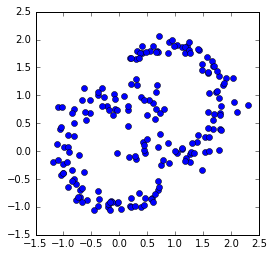

In [33]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
points = np.loadtxt("question2.csv")

x = points[:, 0]
y = points[:, 1]
plt.plot(x, y, "ob")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## 2. k-nearest Neighbour Graph

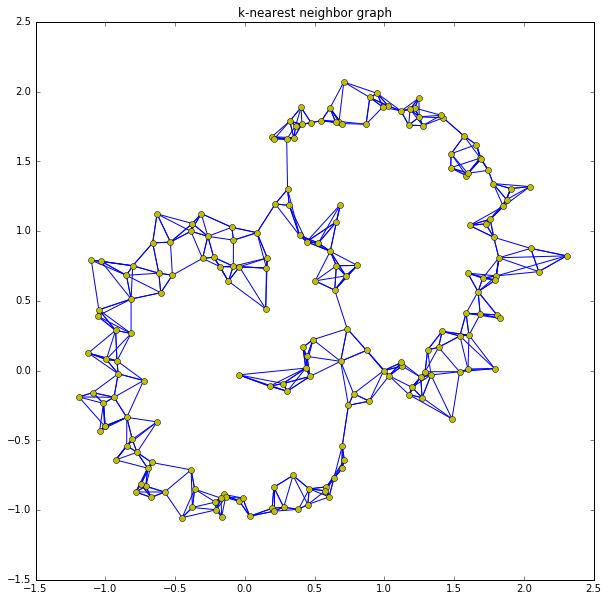

In [34]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

k = 5
N = len(points)
distances = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        if i==j:
            distances[i][j] = 0
        else:
            distances[i][j] = np.sqrt(np.inner(points[i]-points[j], points[i]-points[j]))
            
edges = np.zeros((N, k))
for i in range(N):
    edge = distances[i].argsort()[::1][:k]
    edges[i] = edge
    
plt.figure(figsize=(10,10))

# connect edges on plot
for i in range(N):
    for j in range(k):
        coord = edges[i,j]
        xs = np.array([points[i,0],points[coord,0]])
        ys = np.array([points[i,1],points[coord,1]])
        plt.plot(xs, ys, "b-")

plt.plot(x, y, "oy")
plt.gca().set_aspect('equal', adjustable='box')
plt.title("k-nearest neighbor graph")
plt.show()

## 3. Weight Matrix

In [35]:
sigma = 0.3
W = np.zeros((N,N))
for i in range(N):
    for j in edges[i]:
        W[i,j] = np.exp(-0.5*(distances[i,j]/sigma)**2)
        W[j,i] = np.exp(-0.5*(distances[i,j]/sigma)**2)

## 4. Laplacian Matrix

In [37]:
D = np.zeros((N,N))
invD = np.zeros((N,N))
for i in range(N):
    D[i,i] = sum(W[i])
    invD[i,i] = 1.0/D[i,i]
T = np.dot(W, invD)
L = np.identity(N) - T

Inverse iteration to find the second smallest eigenvalue and the corresponding eigenvector v of the Laplacian.

In [45]:
e_val = 0
mu = 1e-4

while e_val < 5e-5:
    e_vector = np.random.rand(N,1)
    for i in range(100):
        w_vector = np.linalg.solve((L-mu*np.identity(N)),e_vector)
        e_vector = w_vector / np.linalg.norm(w_vector)
        e_val = np.dot(np.transpose(e_vector.conj()),np.dot(L,e_vector))
    mu = mu + 1e-4

## 5. Histogram of Eigenvector

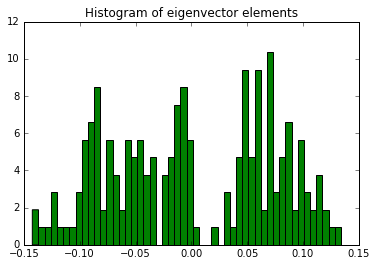

In [48]:
plt.hist(e_vec, 50, normed=1, facecolor='green')
plt.title('Histogram of eigenvector elements')
plt.show()

As it is written in the project description, I can see two hills separated by a shallow valley near the threshold value.

## 6. Assigning Points

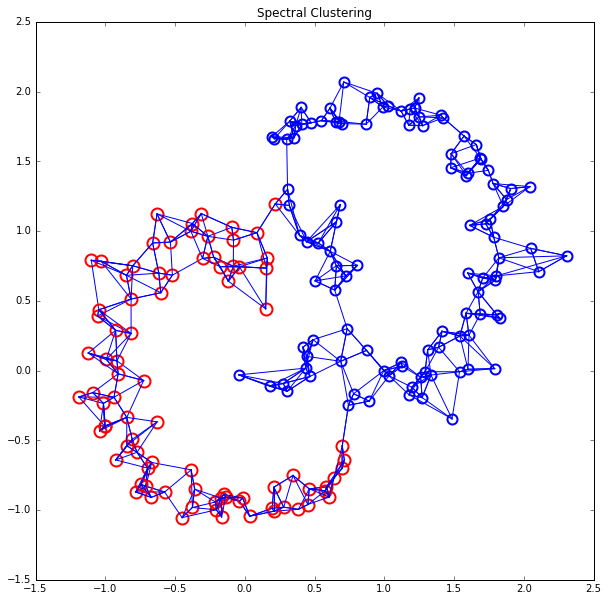

In [65]:
tau = 0.0
plt.figure(figsize=(10,10))
labels = []
for i in range(N):
    if e_vector[i][0] <= tau:
        plt.plot(points[i,0],points[i,1], "bo", markersize = 10, markeredgewidth=2,markeredgecolor="b", markerfacecolor="none")
        # 0 as label
        labels.append(0)
    else:
        plt.plot(points[i,0],points[i,1], "ro", markersize = 12, markeredgewidth=2,markeredgecolor="r", markerfacecolor="none")
        #1 as label
        labels.append(1)
    for j in range(k):
        coord = edges[i,j]
        xs = np.array([points[i,0],points[coord,0]])
        ys = np.array([points[i,1],points[coord,1]])
        plt.plot(xs, ys, "b-")
        
plt.title('Spectral Clustering')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Whole function without explanations

In [67]:
def project3(points, k, sigma, tau):
    x = points[:, 0]
    y = points[:, 1]
    plt.plot(x, y, "ob")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    N = len(points)
    
    distances = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            if i==j:
                distances[i][j] = 0
            else:
                distances[i][j] = np.sqrt(np.inner(points[i]-points[j], points[i]-points[j]))

    edges = np.zeros((N, k))
    for i in range(N):
        edge = distances[i].argsort()[::1][:k]
        edges[i] = edge

    plt.figure(figsize=(10,10))

    # connect edges on plot
    for i in range(N):
        for j in range(k):
            coord = edges[i,j]
            xs = np.array([points[i,0],points[coord,0]])
            ys = np.array([points[i,1],points[coord,1]])
            plt.plot(xs, ys, "b-")

    plt.plot(x, y, "oy")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("k-nearest neighbor graph")
    plt.show()
    
    W = np.zeros((N,N))
    for i in range(N):
        for j in edges[i]:
            W[i,j] = np.exp(-0.5*(distances[i,j]/sigma)**2)
            W[j,i] = np.exp(-0.5*(distances[i,j]/sigma)**2)
            
    D = np.zeros((N,N))
    invD = np.zeros((N,N))
    for i in range(N):
        D[i,i] = sum(W[i])
        invD[i,i] = 1.0/D[i,i]
    T = np.dot(W, invD)
    L = np.identity(N) - T
    
    e_val = 0
    mu = 1e-4

    while e_val < 5e-5:
        e_vector = np.random.rand(N,1)
        for i in range(100):
            w_vector = np.linalg.solve((L-mu*np.identity(N)),e_vector)
            e_vector = w_vector / np.linalg.norm(w_vector)
            e_val = np.dot(np.transpose(e_vector.conj()),np.dot(L,e_vector))
        mu = mu + 1e-4
        
    plt.hist(e_vec, 50, normed=1, facecolor='green')
    plt.title('Histogram of eigenvector elements')
    plt.show()
    
    plt.figure(figsize=(10,10))
    labels = []
    for i in range(N):
        if e_vector[i][0] <= tau:
            plt.plot(points[i,0],points[i,1], "bo", markersize = 10, markeredgewidth=2,markeredgecolor="b", markerfacecolor="none")
            # 0 as label
            labels.append(0)
        else:
            plt.plot(points[i,0],points[i,1], "ro", markersize = 12, markeredgewidth=2,markeredgecolor="r", markerfacecolor="none")
            #1 as label
            labels.append(1)
        for j in range(k):
            coord = edges[i,j]
            xs = np.array([points[i,0],points[coord,0]])
            ys = np.array([points[i,1],points[coord,1]])
            plt.plot(xs, ys, "b-")

    plt.title('Spectral Clustering')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    
    return labels, W